In [1]:
#pip install pydicom

In [2]:
pip install SimpleITK

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


max of top graph    96.399
max of right graph  96.501


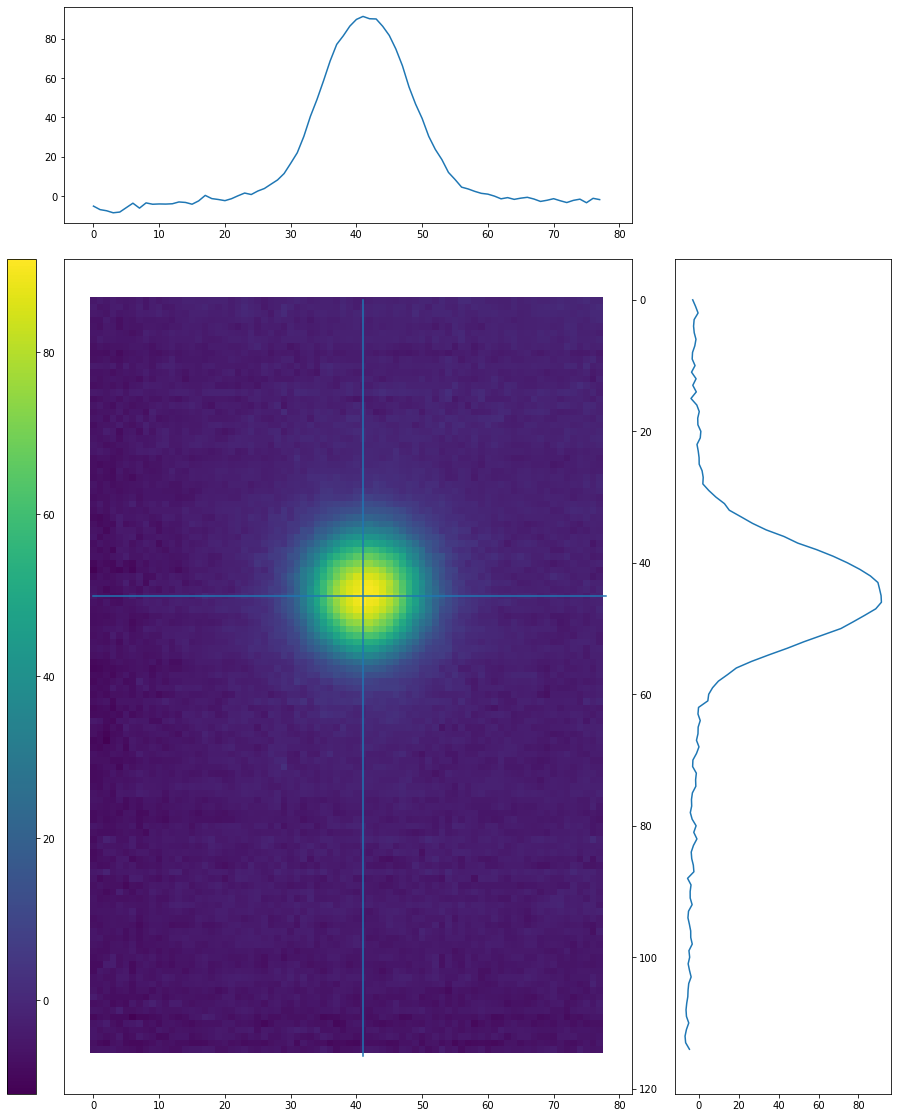

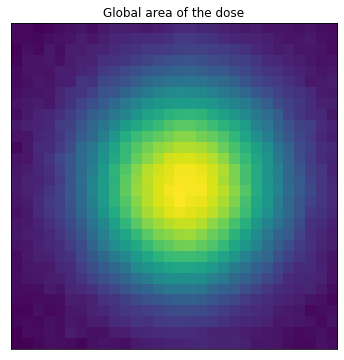

In [17]:
# DRAW MATPLOTLIB IN NOTEBOOK #

#%matplotlib inline
#%matplotlib notebook



# LIBRARIES #

import numpy as np

import matplotlib.pyplot as plt

from matplotlib.lines import Line2D

from mpl_toolkits.axes_grid1 import make_axes_locatable

from scipy import ndimage

import SimpleITK



# INPUT PARAMETERS #
#m_filename = 'G:/Commun/PHYSICIENS/cyber M6/OF/EBT3/colli5_200dpi.tif'
m_filename = 'colli5_72dpi.tif'

m_coefA = 1774.1   #x3
m_coefB = -3907.8  #x2
m_coefC = 3276.7   #x
m_coefD = -935.12



# READS THE IMAGE AND CONVERTS IT TO DOSE #

def readAndConvertImg(filename, coefs):
    # reads the image using simpleITK:
    img = SimpleITK.ReadImage(filename)
    sizex = img.GetWidth()
    sizey = img.GetHeight()
    array = SimpleITK.GetArrayFromImage(img)

    # replaces every 65535 value in array with 65534 to avoid division by zero:
    array[array==65535]=65534

    # converts in optical density
    dor = -np.log10(array[:,:,0]/65535.0)
    dob = -np.log10(array[:,:,2]/65535.0)

    # red channel over blue channel:
    rsb = dor/dob
    rsb[rsb>1.3] = 1.3

    # converting in dose:
    dose = coefs[0]*rsb**3 + coefs[1]*rsb**2 + coefs[2]*rsb + coefs[3]

    return dose, sizex, sizey



# PLOTS THE DOSE IMAGE #

coefs = [m_coefA, m_coefB, m_coefC, m_coefD]

doseimg, sizex, sizey = readAndConvertImg(m_filename, coefs)

# initiates the size of the figure
plt.rcParams['figure.figsize'] = (30,20)

fig, ax1 = plt.subplots()
im1 = ax1.imshow(doseimg)#, cmap="Greys", vmin = 0, vmax = 100)
ax1.yaxis.set_label_position('right')
ax1.yaxis.tick_right()
#ax1.set_title('Dose')

# locates the most irradiation
com = ndimage.measurements.center_of_mass(doseimg[10:sizex-10,10:sizey-10])
comx = int(com[1])+10
comy = int(com[0])+10

# pinpoints the center of the zone
com = ndimage.measurements.center_of_mass(doseimg[comy-10:comy+10, comx-10:comx+10])
comx += int(com[1])-10
comy += int(com[0])-10

#comx = 45
#comy = 41

# displays the surrounding area of the point (comx, comy)
fig2, axn = plt.subplots(figsize=(6, 6))
imn = axn.imshow(doseimg[comy-15:comy+15, comx-15:comx+15])
axn.set_title('Global area of the dose')
axn.get_xaxis().set_visible(False)
axn.get_yaxis().set_visible(False)


# Points 
linex = [0,sizex]
liney = [comy,comy]
line1 = plt.Line2D(linex, liney)
ax1.add_line(line1)
linex = [comx,comx]
liney = [0,sizey]
line2 = plt.Line2D(linex, liney)
ax1.add_line(line2)


try:
    divider1 = make_axes_locatable(ax1)
    
    # color bar creation
    cax1 = divider1.append_axes('left', size='5%', pad=0.4)
    plt.colorbar(im1, cax=cax1)
    
    # top graph creation
    ax2 = divider1.append_axes('top', 3, pad=0.5, sharex=ax1)
    ax2.plot(doseimg[comy,:])
    
    # right graph creation
    ax3 = divider1.append_axes('right', 3, pad=0.6, sharey=ax1)
    ax3.plot(doseimg[:,comx],range(sizey))
    ax3.yaxis.set_visible(False)
    
    print("max of top graph", "{:9.3f}".format(ax2.get_ylim()[1]))
    print("max of right graph", "{:7.3f}".format(ax3.get_xlim()[1]))
    
except:
    print('Error displaying graphs and side bars')

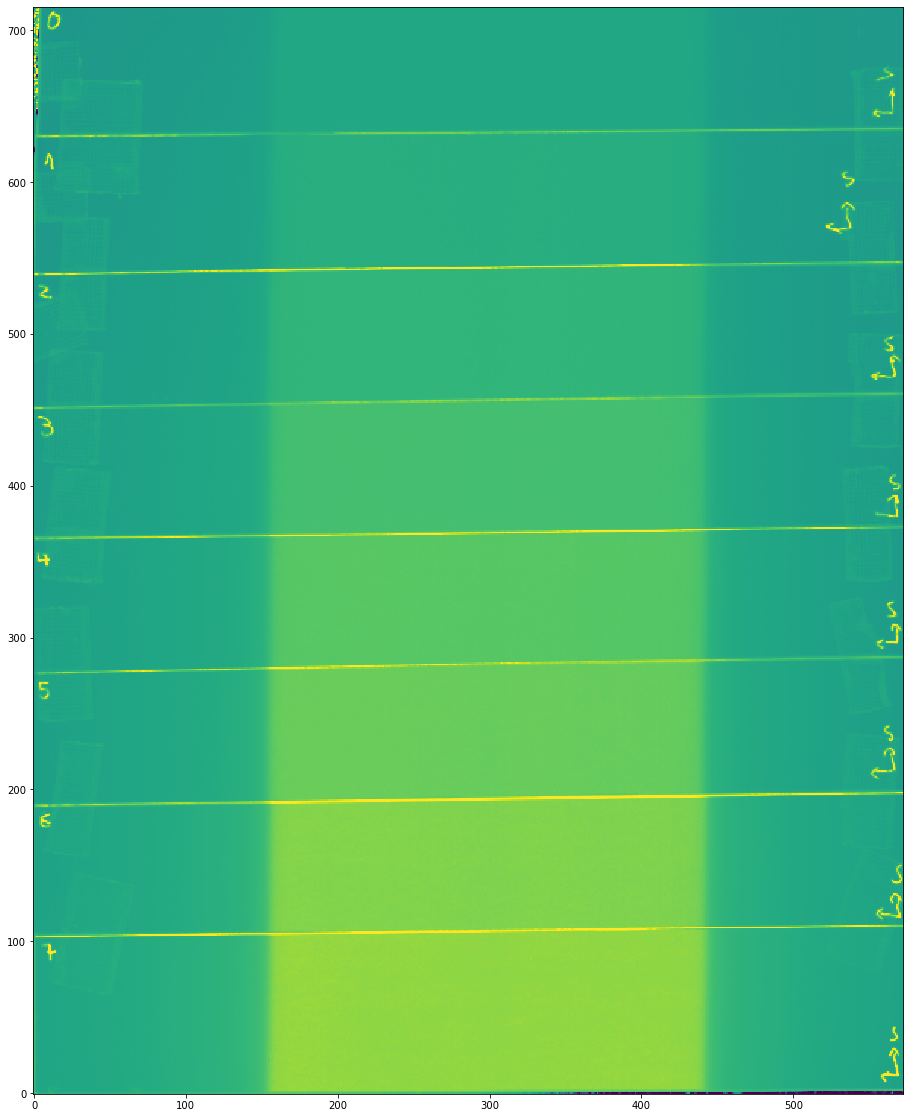

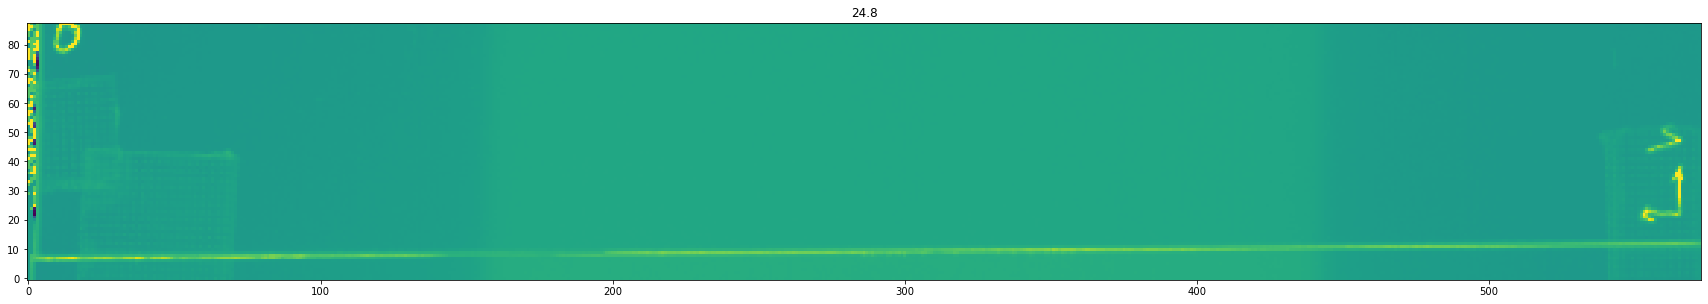

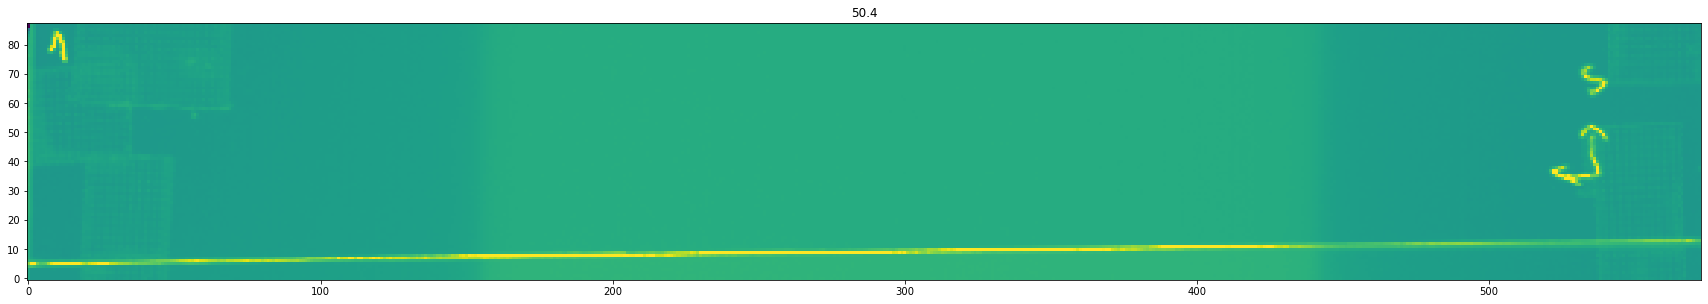

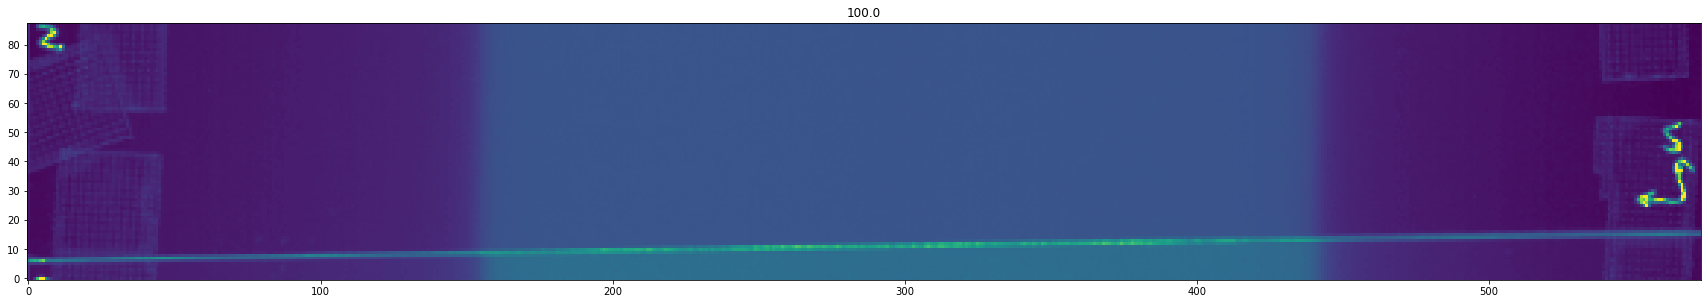

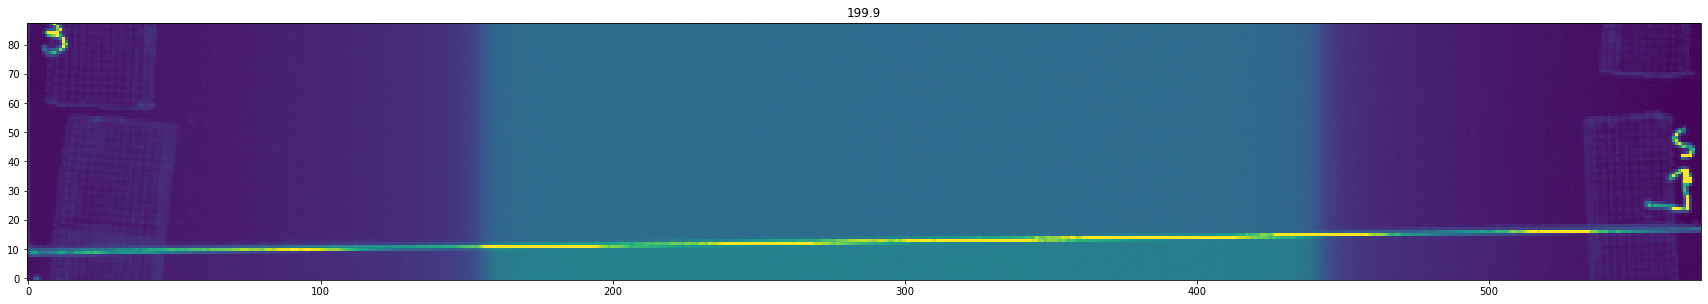

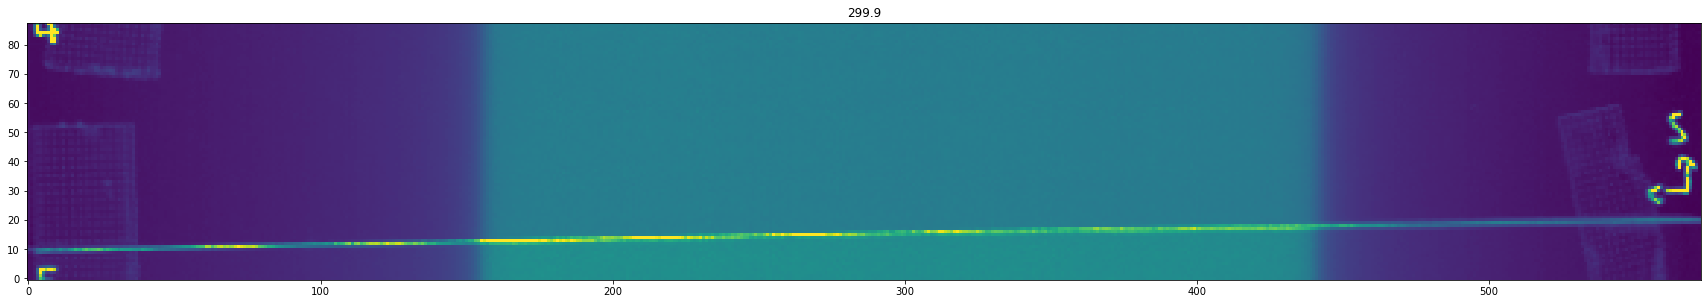

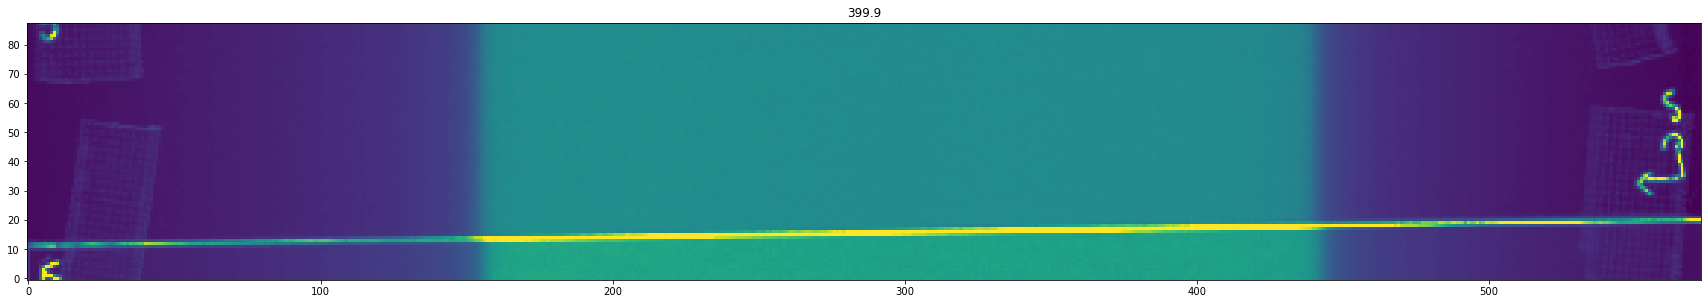

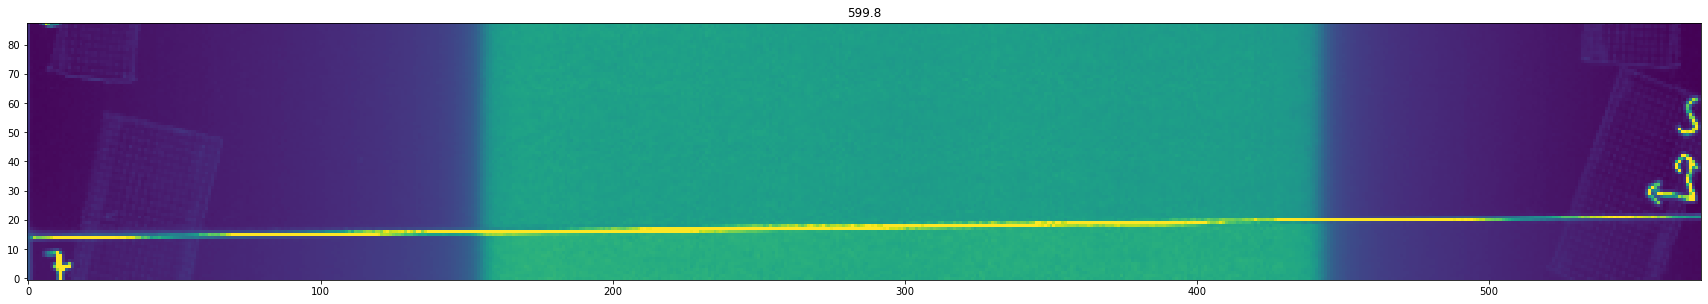

In [15]:
# INPUT PARAMETERS #
m_filename = 'tif1/scan1.tif'

list0 = [799.7, 599.8, 399.9, 299.9, 199.9, 100.0, 50.4, 24.8]



doseimg, sizex, sizey = readAndConvertImg(m_filename, coefs)

x_offset = 10
y_offset = 11
doseimg = doseimg[y_offset : sizey-y_offset, x_offset : sizex-x_offset]
sizex -= 2*x_offset
sizey -= 2*y_offset

plt.rcParams['figure.figsize'] = (30,20)

fig, ax1 = plt.subplots()
im1 = ax1.imshow(doseimg, origin='lower')

divider1 = make_axes_locatable(ax1)

for i in range(7, 0, -1):
    fig, ax2 = plt.subplots()
    ax2.imshow(doseimg[i*(sizey//8) : (i+1)*(sizey//8)-1, :], origin='lower')
    ax2.set_title(list0[i])

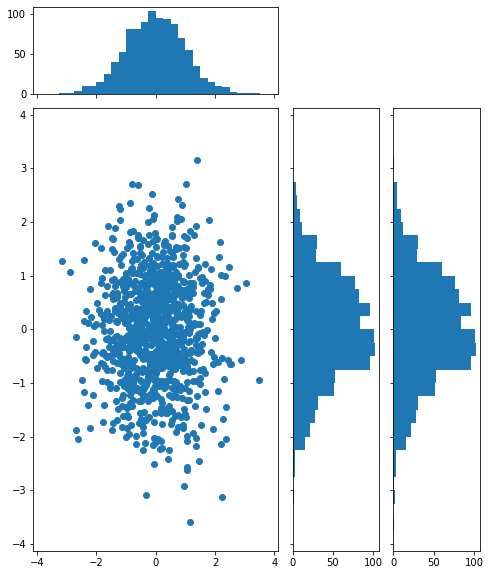

In [16]:
#### DRAFT SHEET ####



import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# the random data
x = np.random.randn(1000)
y = np.random.randn(1000)


fig, axScatter = plt.subplots(figsize=(8, 10))

# the scatter plot:
axScatter.scatter(x, y)

# create new axes on the right and on the top of the current axes
# The first argument of the new_vertical(new_horizontal) method is
# the height (width) of the axes to be created in inches.
divider = make_axes_locatable(axScatter)
axHistx = divider.append_axes('top', 1.2, pad=0.2, sharex=axScatter)
axHisty = divider.append_axes('right', 1.2, pad=0.2, sharey=axScatter)
axHisty2 = divider.append_axes('right', 1.2, pad=0.2, sharey=axScatter)

# make some labels invisible
plt.setp(axHistx.get_xticklabels() + axHisty.get_yticklabels() + axHisty2.get_yticklabels(),
         visible=False)

# now determine nice limits by hand:
binwidth = 0.25
xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
lim = (int(xymax/binwidth) + 1)*binwidth

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')
axHisty2.hist(y, bins=bins, orientation='horizontal')

# the xaxis of axHistx and yaxis of axHisty are shared with axScatter,
# thus there is no need to manually adjust the xlim and ylim of these
# axis.

#axHistx.axis["bottom"].major_ticklabels.set_visible(False)
for tl in axHistx.get_xticklabels():
    tl.set_visible(False)
axHistx.set_yticks([0, 50, 100])

#axHisty.axis["left"].major_ticklabels.set_visible(False)
for tl in axHisty.get_yticklabels():
    tl.set_visible(False)
axHisty.set_xticks([0, 50, 100])

for tl in axHisty2.get_yticklabels():
    tl.set_visible(False)
axHisty2.set_xticks([0, 50, 100])

plt.draw()
plt.show()

##########

#list0 = [24.8, 50.4, 100.0, 199.9, 299.9, 399.9, 599.8, 799.7]

#centy = (2*i+1)*(sizey//8)//2
#ax2.imshow(doseimg[centy-10 : centy+10, :], origin='lower')



#########